In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cifar10_classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
random_state = 42

In [3]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
X_train = train_images
y_train = train_labels
X_test = test_images
y_test = test_labels

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=random_state)

In [9]:
normal_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255)
augmented_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255, rotation_range=30, horizontal_flip=True, zoom_range=0.1, shear_range=0.2)

normal_generator = normal_generator.flow(X_train, y_train, batch_size=1, shuffle=False)
augmented_generator = augmented_generator.flow(X_train, y_train, batch_size=1, shuffle=False)

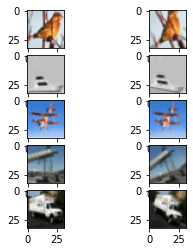

In [12]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(4, 4))
for row_index in range(5):
    normal_sample, label = next(normal_generator)
    augmented_sample, _ = next(augmented_generator)
    ax[row_index, 0].imshow(normal_sample.squeeze())
    ax[row_index, 1].imshow(augmented_sample.squeeze())

In [ ]:
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size = 3, strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)),
    keras.layers.Conv2D(32, kernel_size = 3, strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(64, kernel_size = 3, strides=(1,1), padding='same', activation='relu'),
    keras.layers.Conv2D(64, kernel_size = 3, strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(cifar10_classes), activation='softmax')
])

learning_rate = 3e-4
optimizer = Adam(learning_rate)
loss_function = keras.losses.SparseCategoricalCrossentropy()


model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=['accuracy'])

In [ ]:
batch_size = 128

train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255, rotation_range=10, horizontal_flip=True, zoom_range=0.1, shear_range=0.1)
valid_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255)

train_generator_with_data = train_generator.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
valid_generator_with_data = valid_generator.flow(X_val, y_val, batch_size=batch_size)

In [ ]:
model.fit(train_generator_with_data,
          epochs=50,
          validation_data=valid_generator_with_data,
          verbose=1,
          workers=2,
          use_multiprocessing=True)

# ImageNet

In [ ]:
base_model = keras.applications.ResNet50(include_top=False,
                                      weights='imagenet',
                                      input_shape=(32, 32, 3))
base_model.trainable = False 